In [1]:
import json
from pathlib import Path

from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
from tabulate import tabulate

from contact_graspnet.utils.misc import get_root_dir
from contact_graspnet.utils.visualization import mlab_pose_vis
from contact_graspnet.datatypes import GraspCam

2023-02-21 08:55:59.265676: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-21 08:56:00.741403: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/moritz/catkin_ws/devel/lib:/opt/ros/noetic/lib:/home/moritz/.mujoco/mujoco210/bin:/home/moritz/mambaforge/envs/contact/lib/:/home/moritz/mambaforge/envs/contact/lib/
2023-02-21 08:56:00.741552: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No

0: 001_master_chef_can.npz


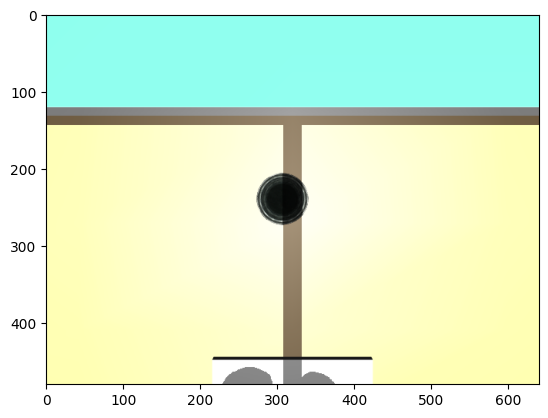

1: 002_cracker_box.npz


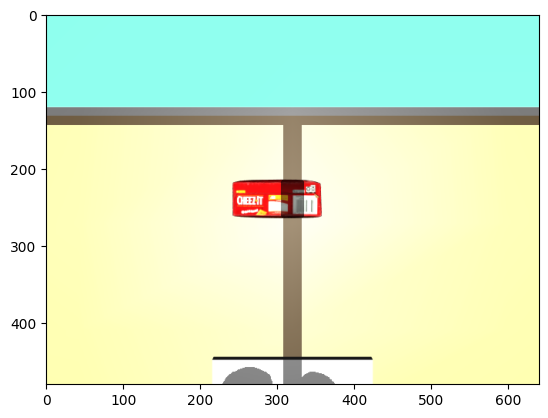

2: 003_sugar_box.npz


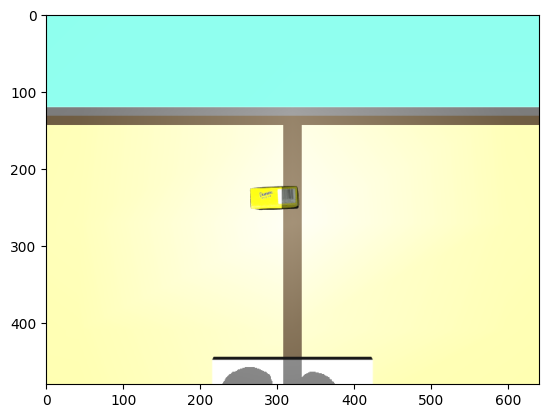

3: 004_tomato_soup_can.npz


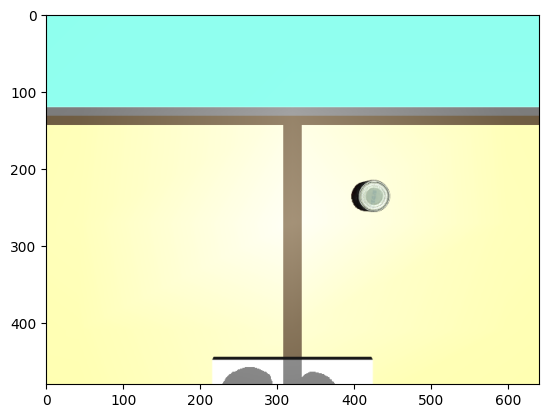

4: 005_mustard_bottle.npz


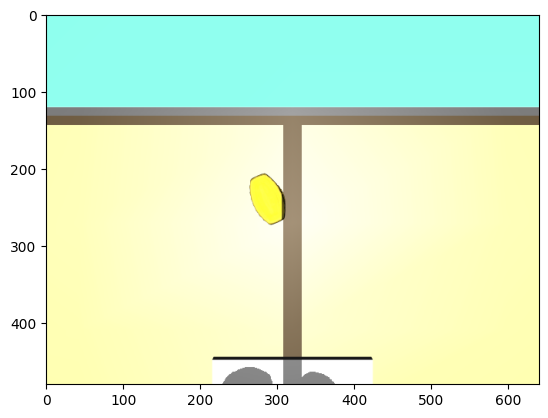

5: 006_tuna_fish_can.npz


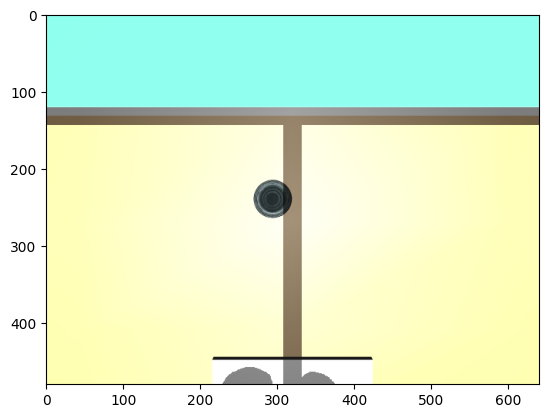

6: 007_pudding_box.npz


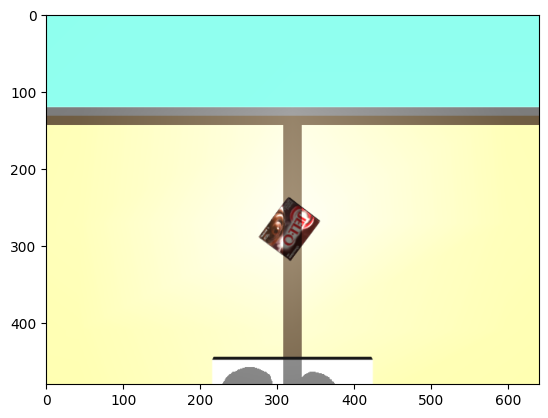

7: 008_gelatin_box.npz


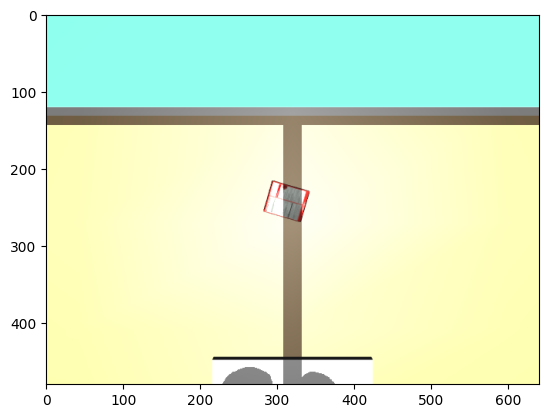

8: 009_potted_meat_can.npz


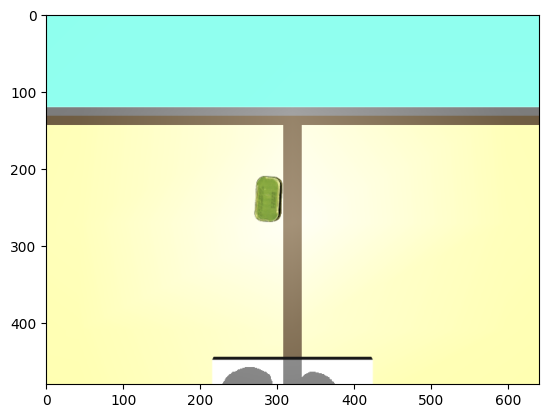

9: 010_banana.npz


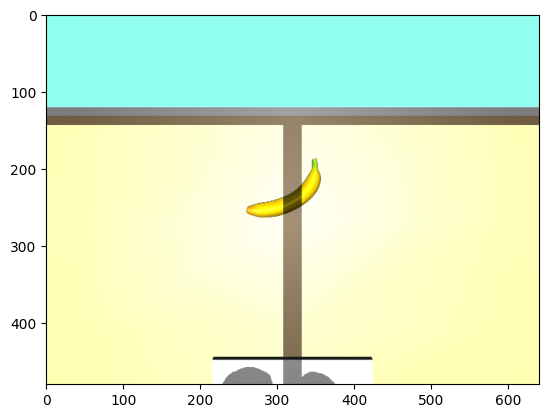

10: 011_strawberry.npz


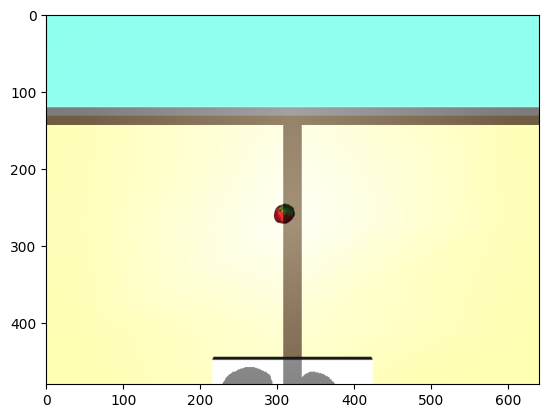

11: 012_apple.npz


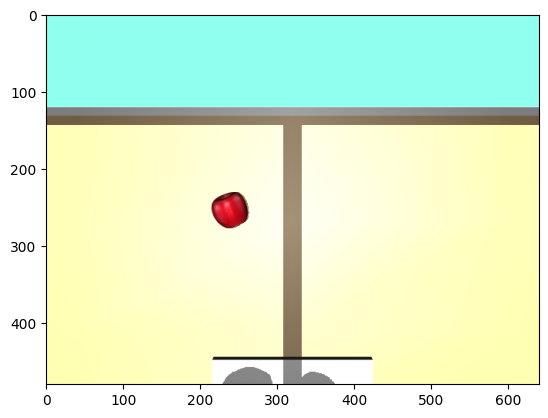

12: 013_lemon.npz


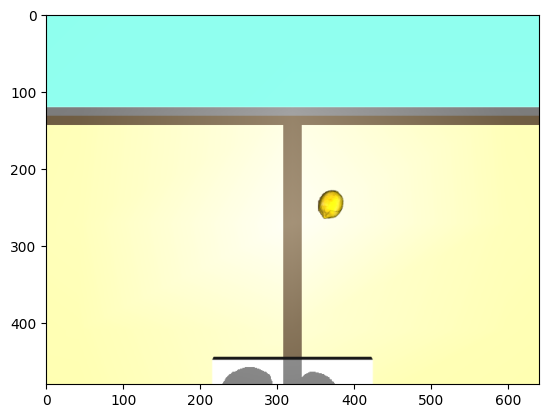

13: 014_peach.npz


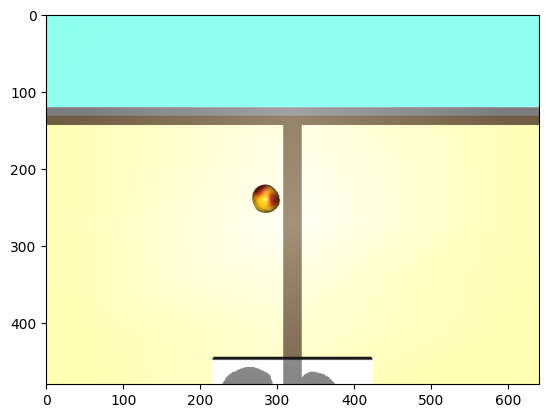

14: 015_pear.npz


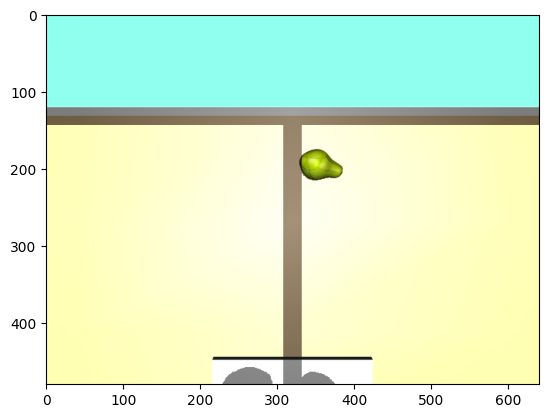

15: 016_orange.npz


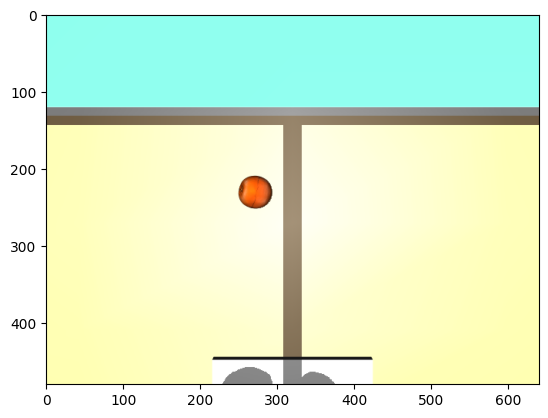

16: 017_plum.npz


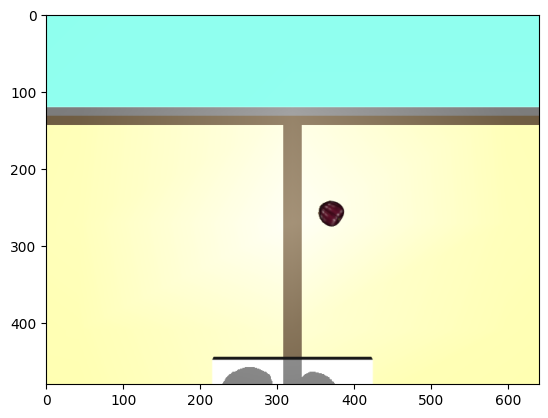

17: 018_pitcher_base.npz


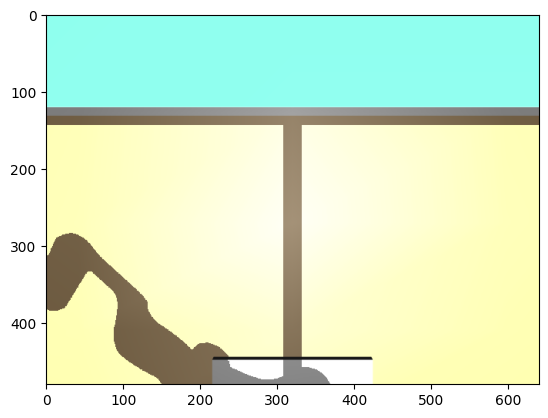

18: 019_bleach_cleanser.npz


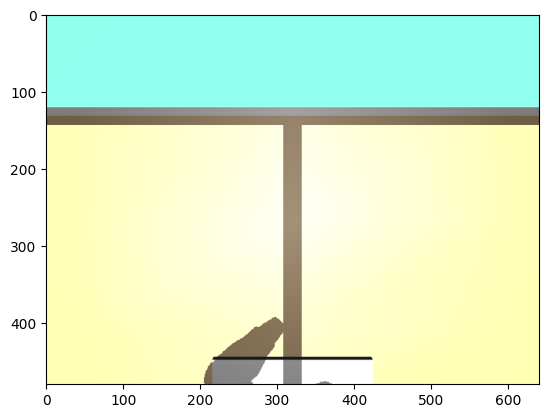

19: 021_bowl.npz


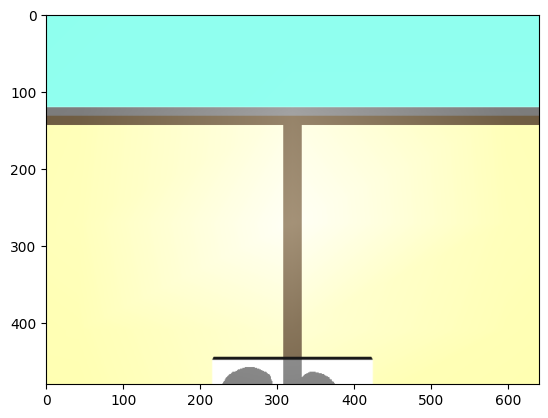

20: 022_mug.npz


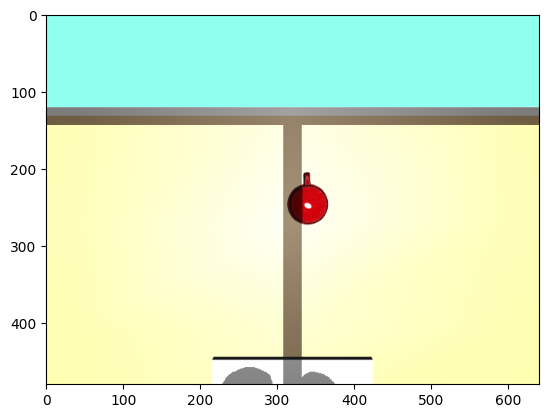

21: 023_sponge.npz


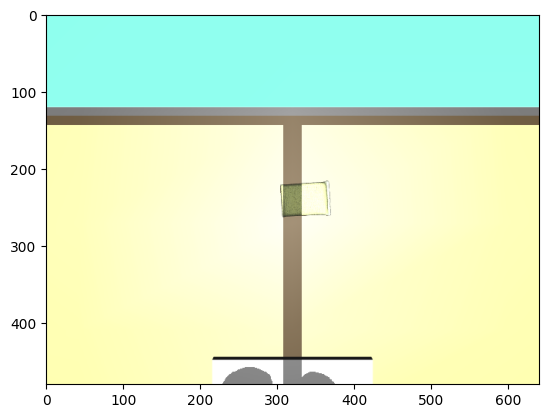

22: 025_plate.npz


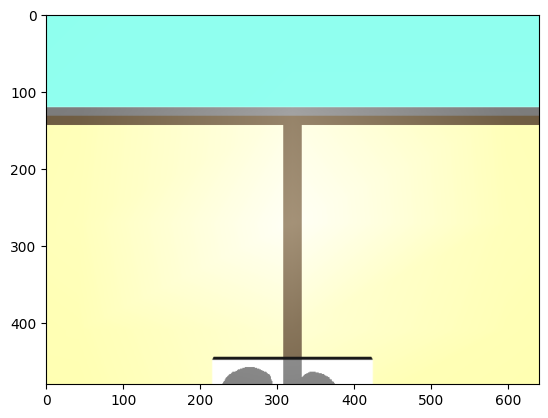

23: 026_fork.npz


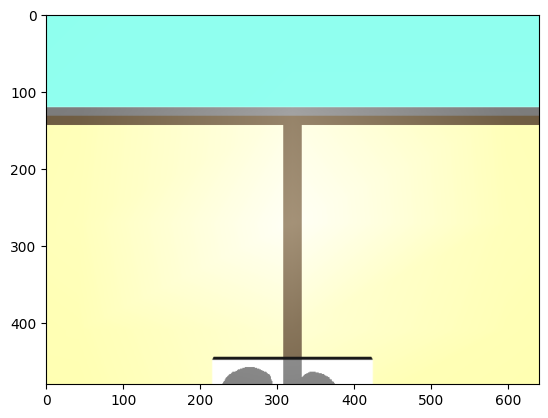

24: 027_spoon.npz


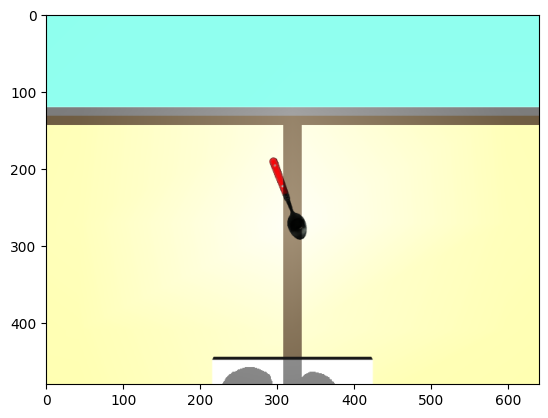

25: 028_knife.npz


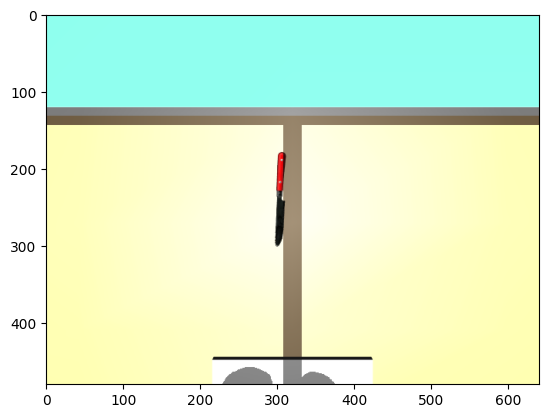

26: 029_spatula.npz


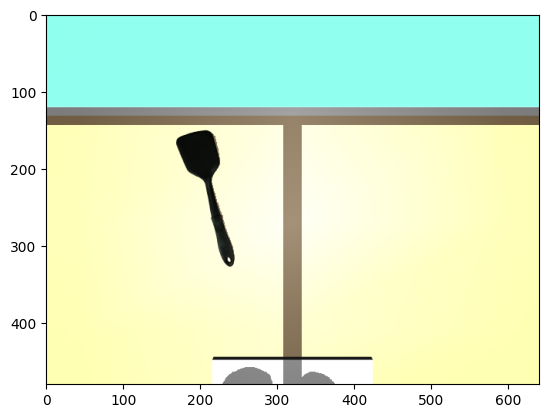

27: 030_power_drill.npz


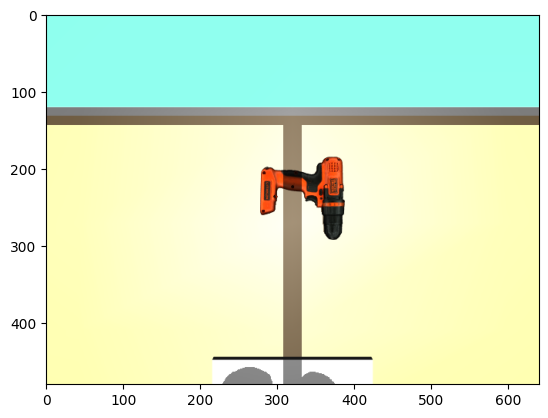

28: 031_wood_block.npz


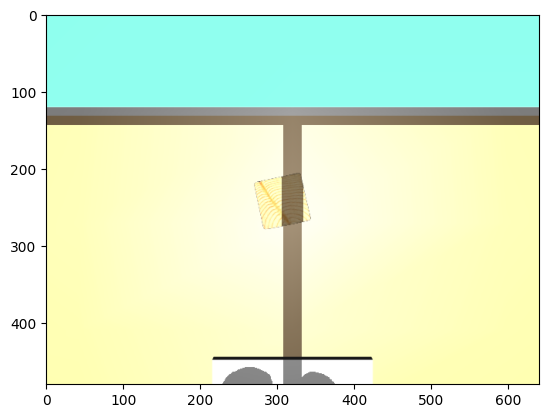

29: 032_scissors.npz


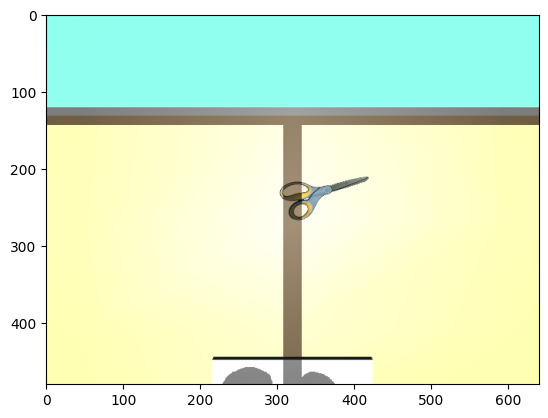

30: 034_large_marker.npz


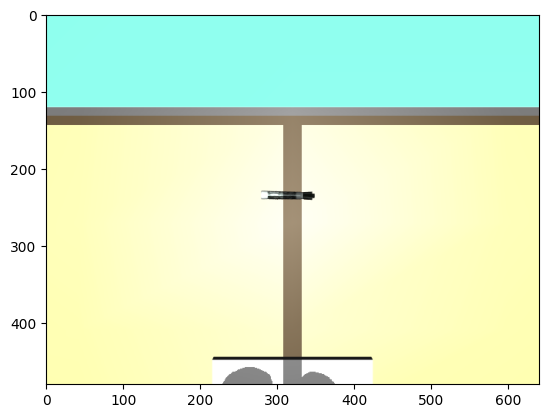

31: 036_adjustable_wrench.npz


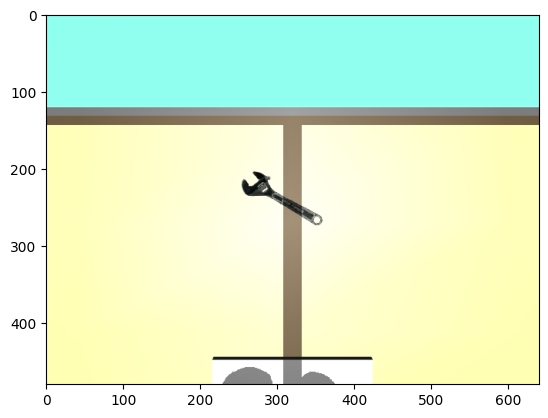

32: 037_phillips_screwdriver.npz


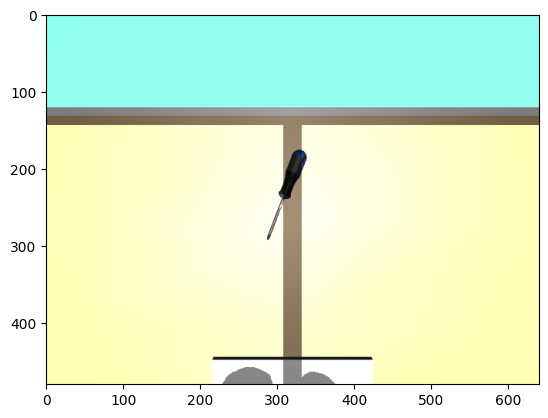

33: 038_flat_screwdriver.npz


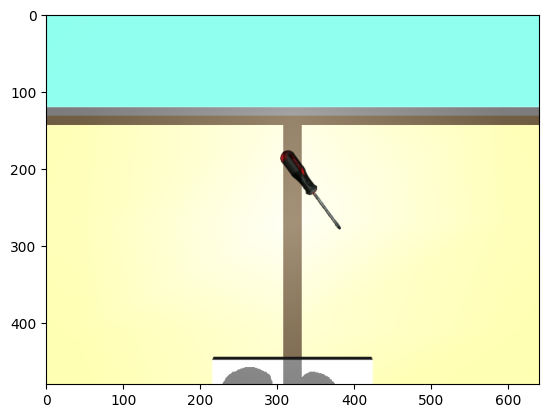

34: 039_hammer.npz


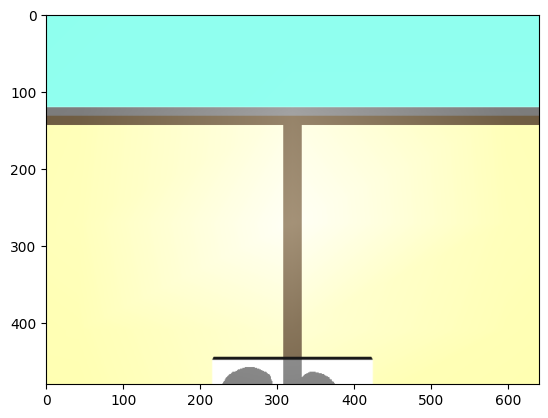

35: 041_medium_clamp.npz


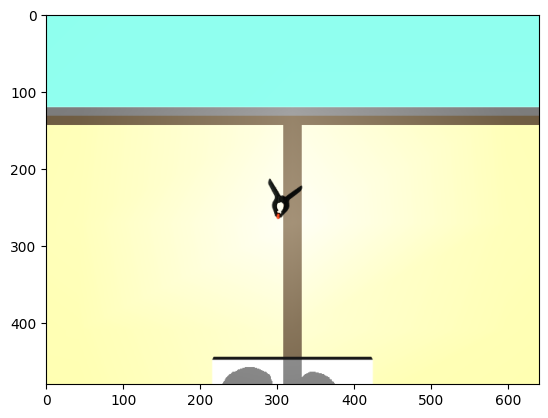

36: 042_large_clamp.npz


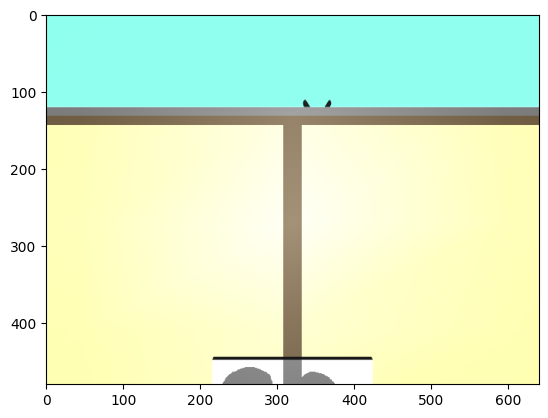

37: 043_extra_large_clamp.npz


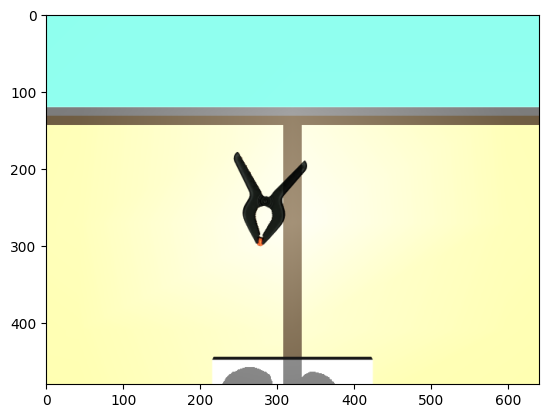

38: 044_mini_soccer_ball.npz


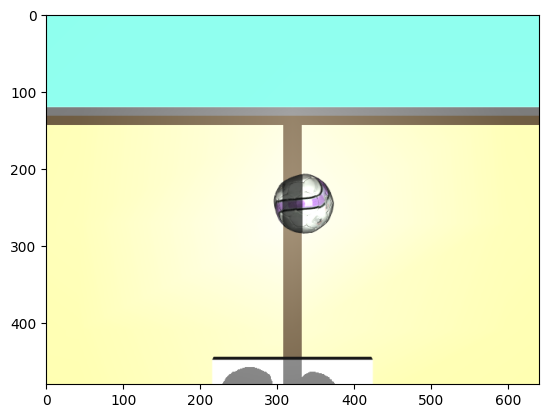

39: 045_softball.npz


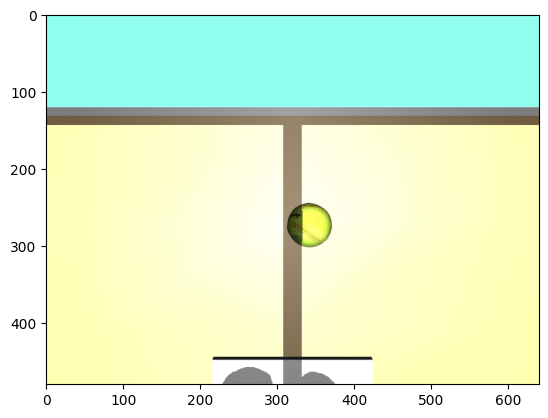

40: 046_baseball.npz


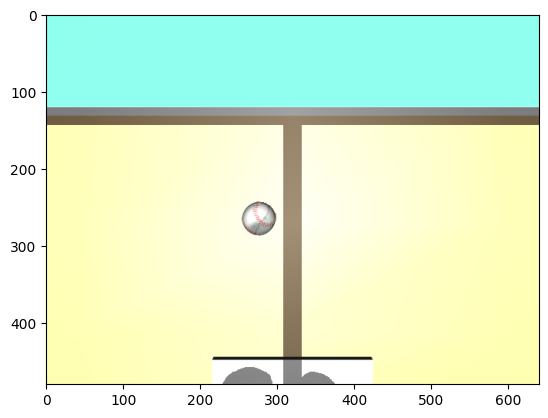

41: 047_tennis_ball.npz


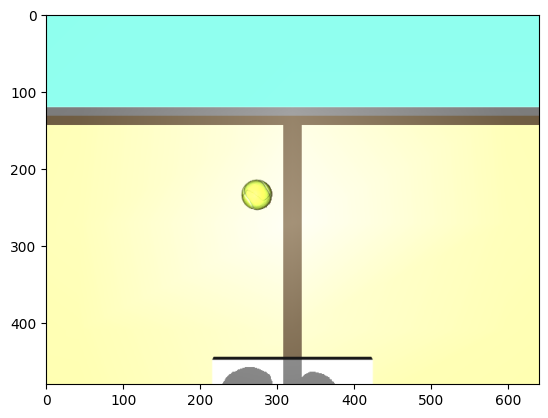

42: 048_racquetball.npz


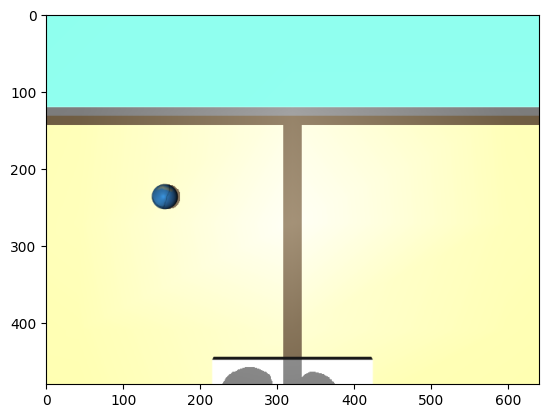

43: 049_golf_ball.npz


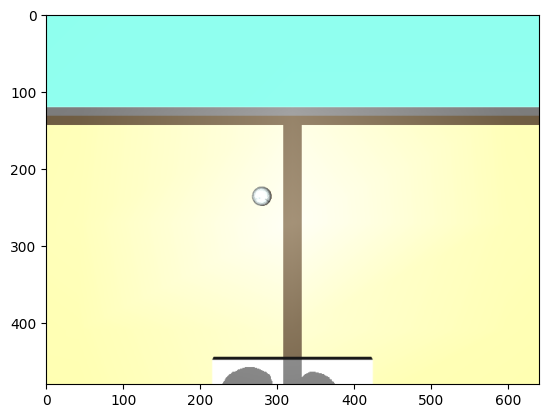

44: 050_chain.npz


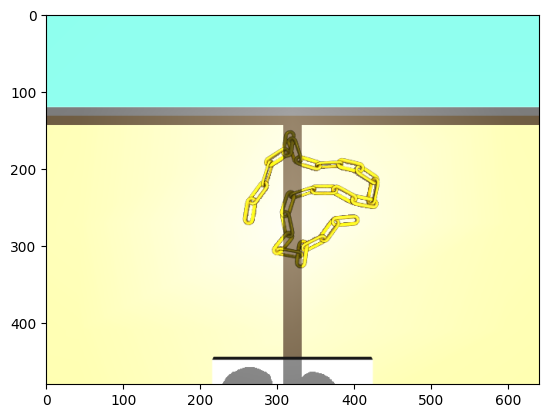

45: 051_foam_brick.npz


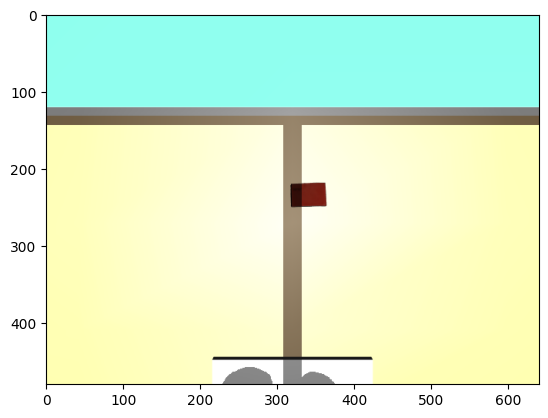

46: 052_dice.npz


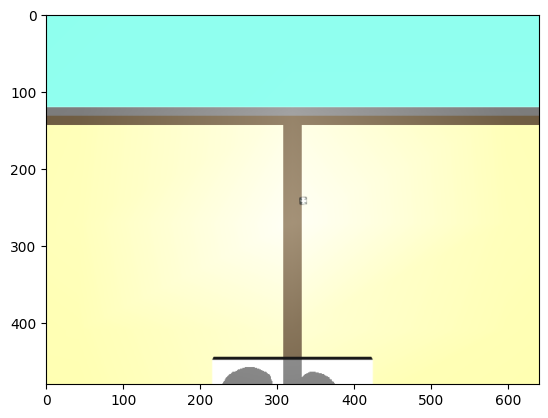

47: 053_a_marbles.npz


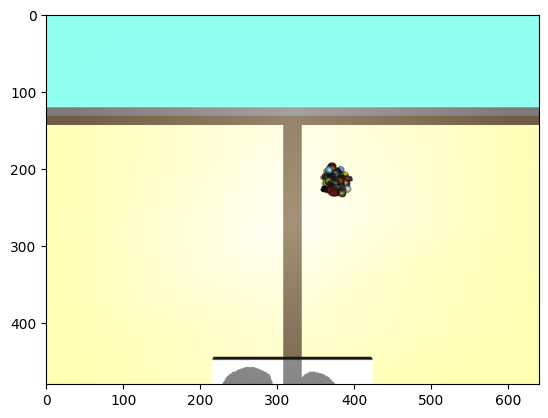

48: 054_b_marbles.npz


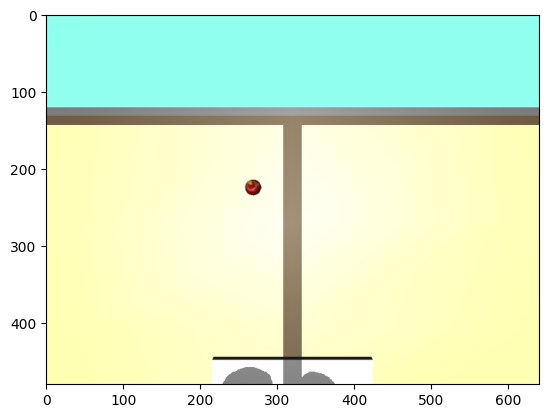

49: 055_a_cups.npz


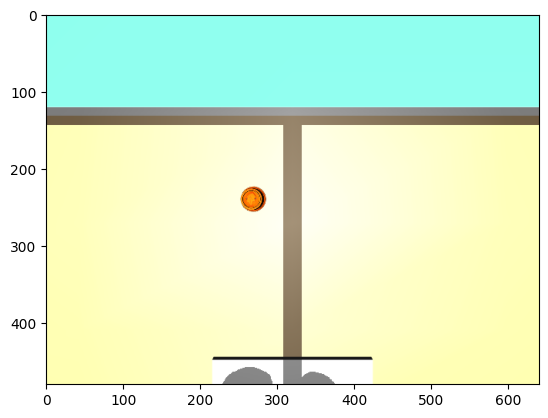

50: 056_b_cups.npz


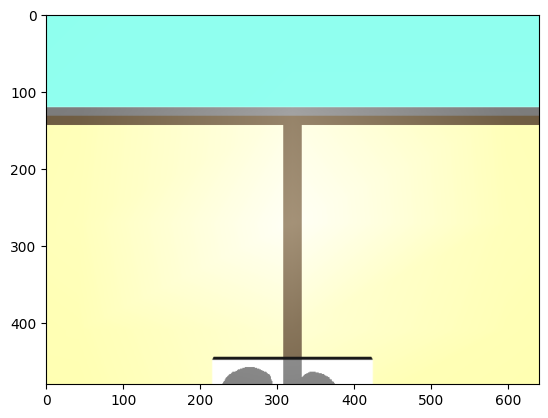

51: 057_c_cups.npz


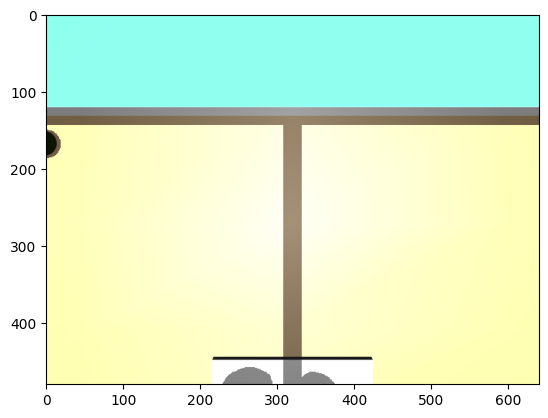

52: 058_d_cups.npz


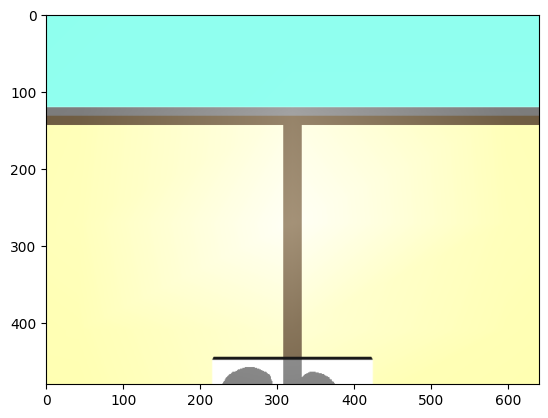

53: 059_e_cups.npz


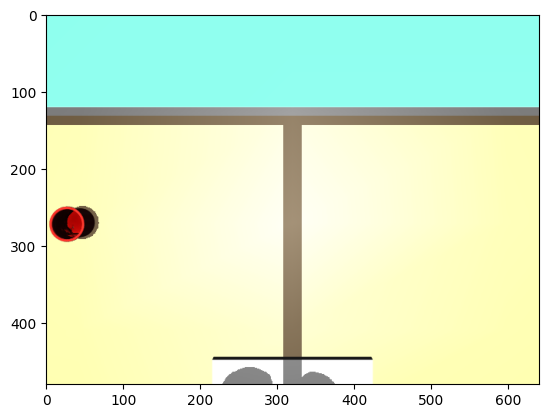

54: 060_f_cups.npz


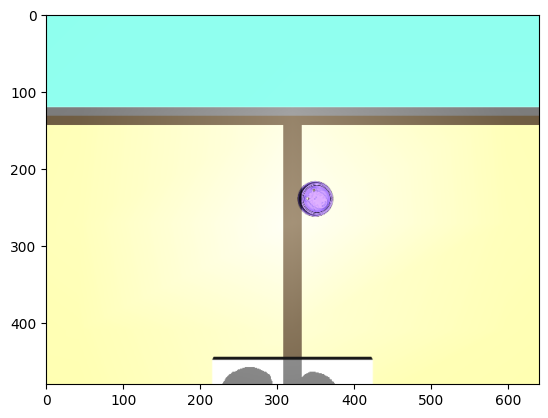

55: 061_g_cups.npz


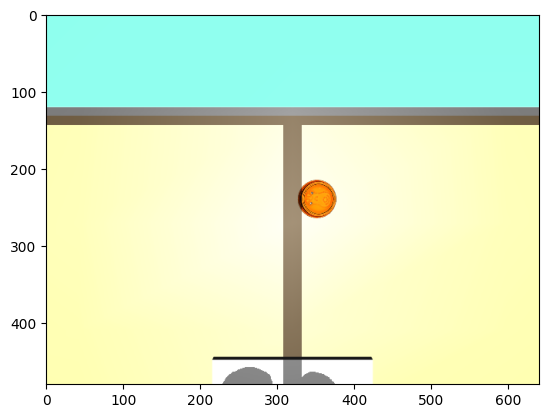

56: 062_h_cups.npz


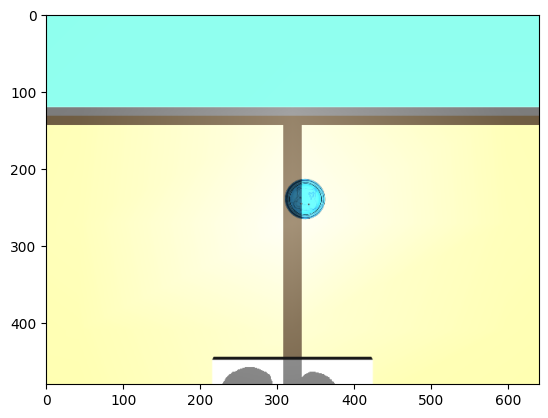

57: 063_i_cups.npz


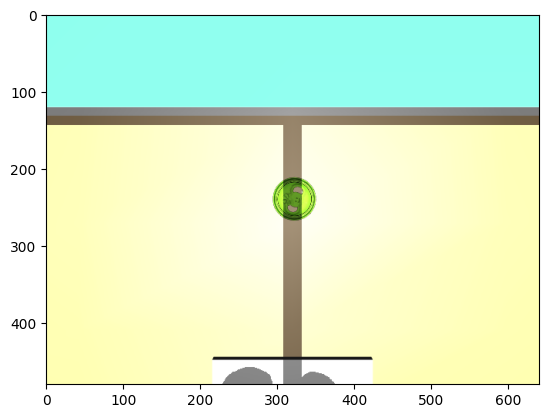

58: 064_j_cups.npz


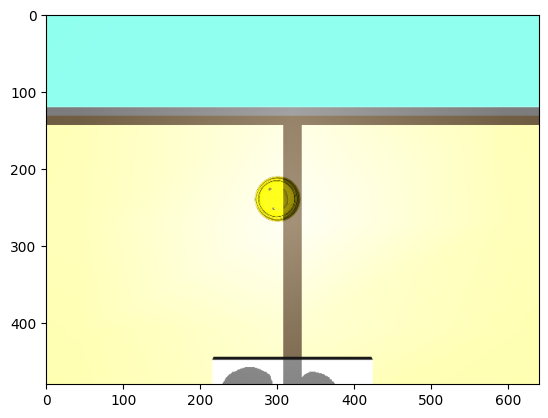

59: 065_a_colored_wood_blocks.npz


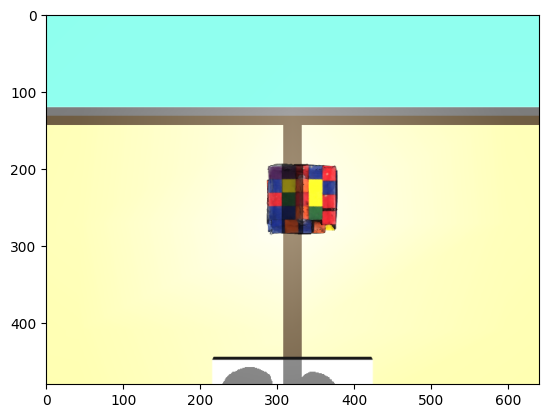

60: 066_b_colored_wood_blocks.npz


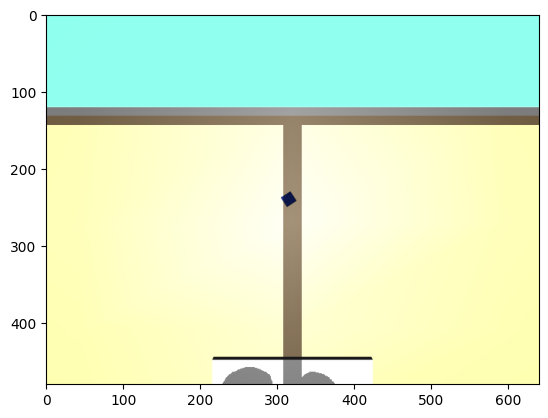

61: 067_nine_hole_peg_test.npz


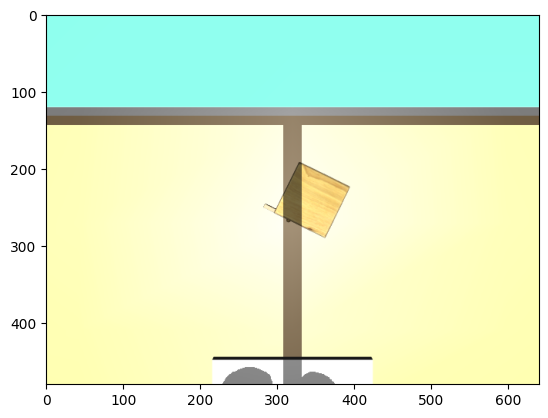

62: 068_a_toy_airplane.npz


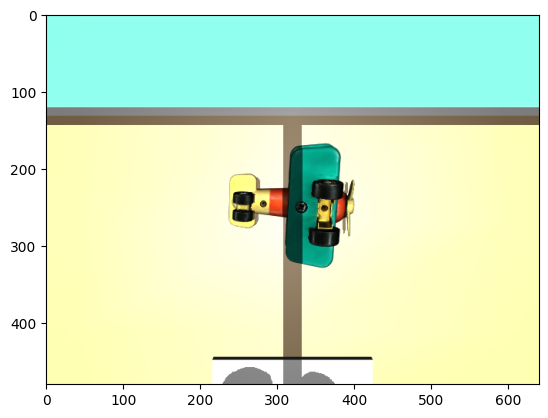

63: 069_b_toy_airplane.npz


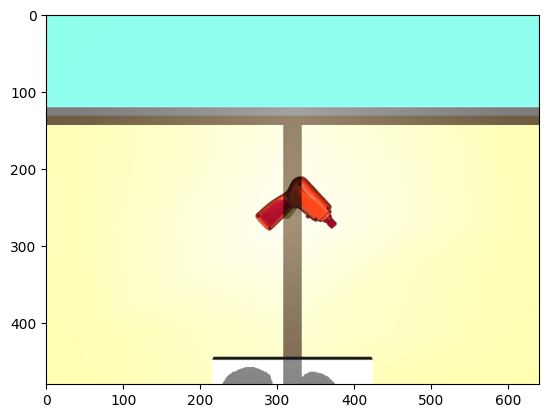

64: 070_c_toy_airplane.npz


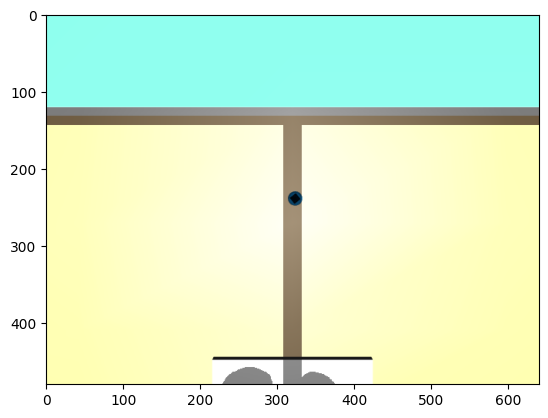

65: 071_d_toy_airplane.npz


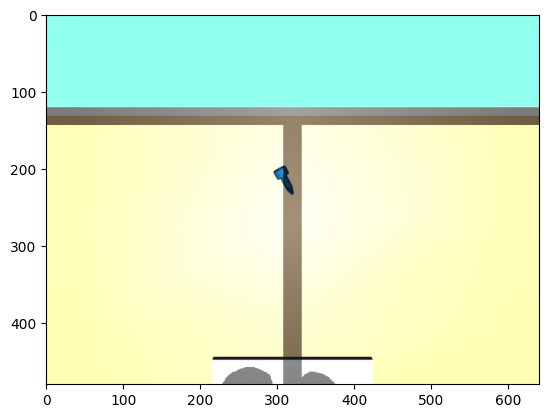

66: 072_e_toy_airplane.npz


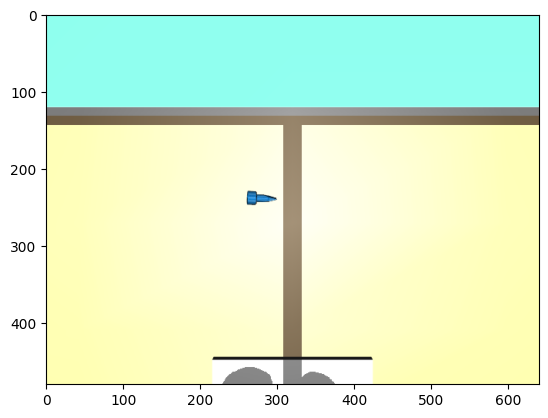

67: 075_a_lego_duplo.npz


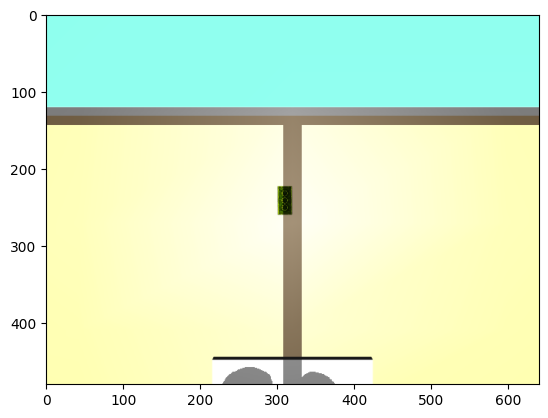

68: 076_b_lego_duplo.npz


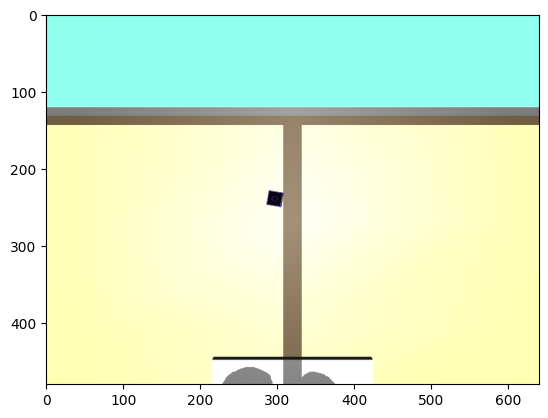

69: 077_c_lego_duplo.npz


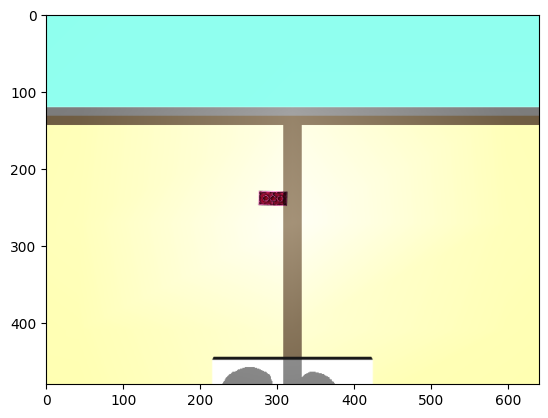

70: 078_d_lego_duplo.npz


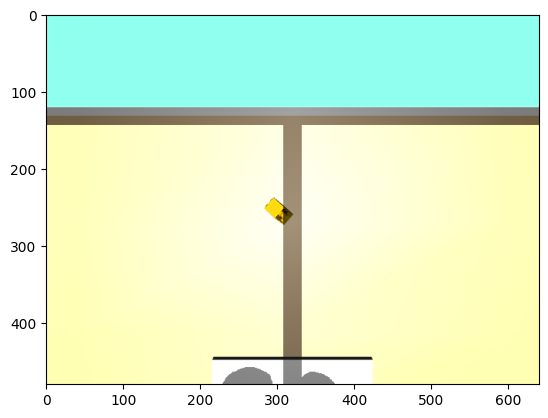

71: 079_e_lego_duplo.npz


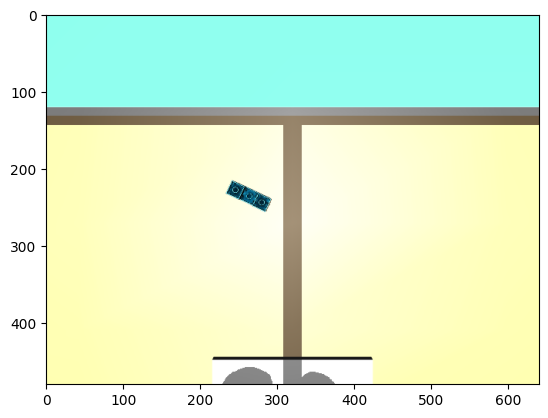

72: 080_f_lego_duplo.npz


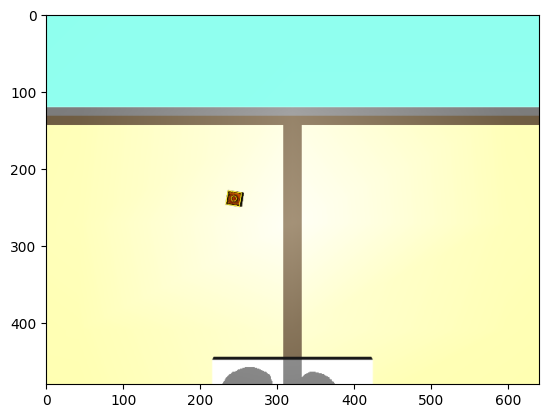

73: 081_g_lego_duplo.npz


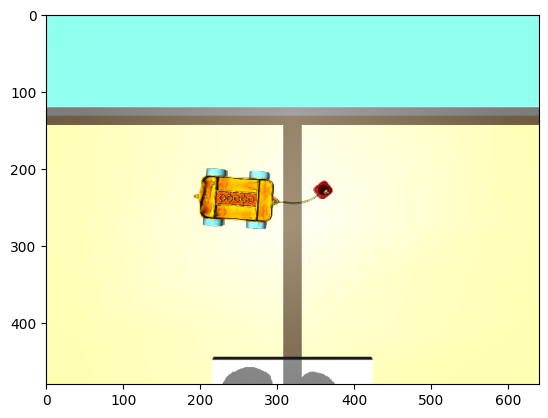

74: 084_j_lego_duplo.npz


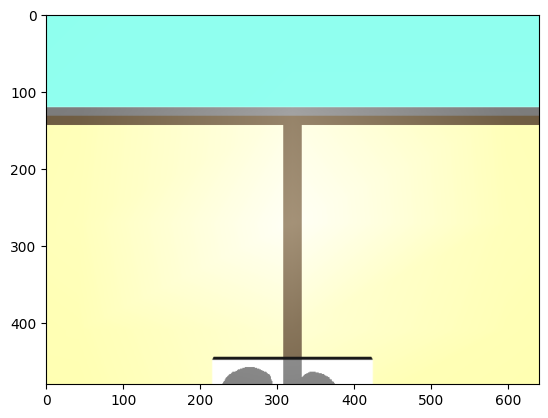

75: 089_rubiks_cube.npz


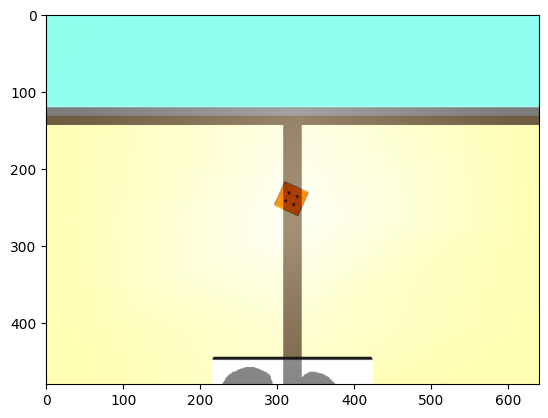

76: config.yaml


ValueError: Cannot load file containing pickled data when allow_pickle=False

In [2]:
### plot all original images ###

ycb_path = Path.home() / "Documents" / "ycb_sim_data_1"
obj_names = sorted([p.name for p in ycb_path.iterdir()])

for i, name in enumerate(obj_names):
    print(f"{i}: {name}")

    img = np.load(ycb_path / name)["rgb_img"]

    plt.imshow(img)

    plt.show()

In [4]:
ycb_result_paths = [
    get_root_dir() / "data" / "results" / "ycb_sim_data_1",
    get_root_dir() / "data" / "results" / "ycb_sim_data_2",
    get_root_dir() / "data" / "results" / "ycb_sim_data_3",
]
ycb_result_names = sorted([p.name for p in ycb_result_paths[0].iterdir() if p.is_dir()])

example_result_paths = [
    get_root_dir() / "data" / "results" / "orig_test_data_seg1",
    get_root_dir() / "data" / "results" / "orig_test_data_seg2",
    get_root_dir() / "data" / "results" / "orig_test_data_seg3",
    get_root_dir() / "data" / "results" / "orig_test_data_seg4",
]
example_result_names = sorted([p.name for p in example_result_paths[0].iterdir() if p.is_dir()])



In [ ]:
### show the mlab visualization of all results in a folder ###

result_path = result_paths[0]

for result_name in result_names:
    print(result_name)

    mlab_pose_vis(
        np.load(result_path / result_name / "full_pc.npy"),
        [
            GraspCam(**d)
            for d in json.load(open(result_path / result_name / "data.json"))[
                "grasps_cam"
            ]
        ],
        np.load(result_path / result_name / "full_pc_colors.npy"),
    )


ycb_sim_data_1
samples with no grasps: 8


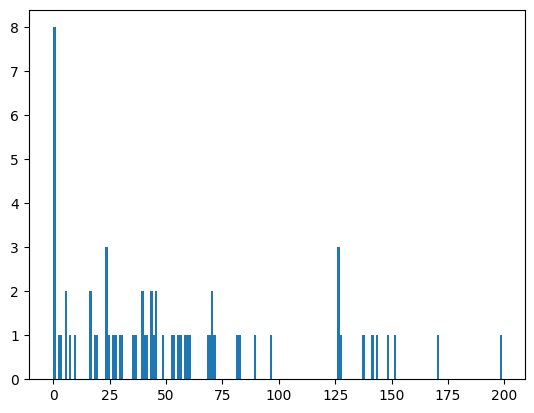

ycb_sim_data_2
samples with no grasps: 20


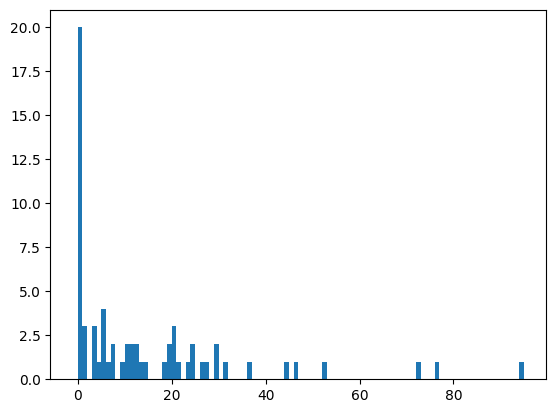

ycb_sim_data_3
samples with no grasps: 19


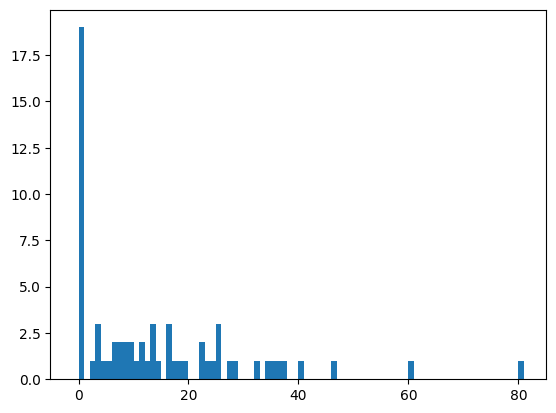

names                        ycb_sim_data_1    ycb_sim_data_2    ycb_sim_data_3
-------------------------  ----------------  ----------------  ----------------
001_master_chef_can                      71                 1                 3
002_cracker_box                          43                76                35
003_sugar_box                            55                52                36
004_tomato_soup_can                     148                29                60
005_mustard_bottle                       82                36                28
006_tuna_fish_can                         5                 6                 6
007_pudding_box                           0                 0                 5
008_gelatin_box                           0                 0                 7
009_potted_meat_can                     126                20                19
010_banana                               48                18                 9
011_strawberry                          

In [15]:
### histograms of the number of grasps per sampe

n_grasps_table = {}
n_grasps_table["names"] = ycb_result_names + ["total"]

for result_path in ycb_result_paths:
    n_grasps = []
    n_grasps_table[result_path.name] = []

    for result_name in ycb_result_names:
        with open(result_path / result_name / "data.json") as f:
            data = json.load(f)

        n = len(data["grasps_cam"])
        
        n_grasps.append(n)
        n_grasps_table[result_path.name].append(n)

    n_grasps = np.array(n_grasps)
    n_grasps_table[result_path.name].append(sum(n_grasps))

    plt.hist(n_grasps, bins=np.arange(-1, max(n_grasps)+1))
    print(result_path.name)
    print(f"samples with no grasps: {np.sum(n_grasps == 0)}")
    plt.show()

print(tabulate(n_grasps_table, headers="keys"))

In [ ]:
# for result_name in result_names:
#     fig, axes = plt.subplots(2, len(result_paths), figsize=(10, 5))
#     fig.suptitle(result_name)
#     fig.tight_layout()

#     for i, result_path in enumerate(result_paths):
#         all_grasps = mpl.image.imread(result_path / result_name / "all_grasps.png")
#         best_grasp = mpl.image.imread(result_path / result_name / "best_grasp.png")

#         axes[i][0].imshow(all_grasps)
#         axes[i][0].set_title("all grasps")

#         axes[i][1].imshow(best_grasp)
#         axes[i][1].set_title("best grasp")

#     plt.show()
